<h4>Task 1 part b Feature Regression <h4>

In [43]:
import numpy as np
import pandas as pd 

In [144]:
#Load data

train_path = 'task1b_ql4jfi6af0/train.csv'

training_data = pd.read_csv(train_path)
t = training_data['Id']
y = training_data['y']
X = training_data[['x1','x2','x3','x4','x5']]
y_train = y.to_numpy()
X_train = X.to_numpy()

In [145]:
feature_vector = np.concatenate((X,X**2,np.exp(X),np.cos(X),np.ones([700,1])),axis = 1)
pd.DataFrame(feature_vector)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1.0
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1.0
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1.0
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1.0
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.31,-0.09,0.04,-0.09,0.03,0.0961,0.0081,0.0016,0.0081,0.0009,...,0.913931,1.040811,0.913931,1.030455,0.952334,0.995953,0.999200,0.995953,0.999550,1.0
696,-0.26,-0.01,0.02,-0.40,0.05,0.0676,0.0001,0.0004,0.1600,0.0025,...,0.990050,1.020201,0.670320,1.051271,0.966390,0.999950,0.999800,0.921061,0.998750,1.0
697,-0.27,-0.22,-0.01,-0.32,-0.05,0.0729,0.0484,0.0001,0.1024,0.0025,...,0.802519,0.990050,0.726149,0.951229,0.963771,0.975897,0.999950,0.949235,0.998750,1.0
698,0.19,0.11,-0.05,-0.27,-0.04,0.0361,0.0121,0.0025,0.0729,0.0016,...,1.116278,0.951229,0.763379,0.960789,0.982004,0.993956,0.998750,0.963771,0.999200,1.0


(700,)


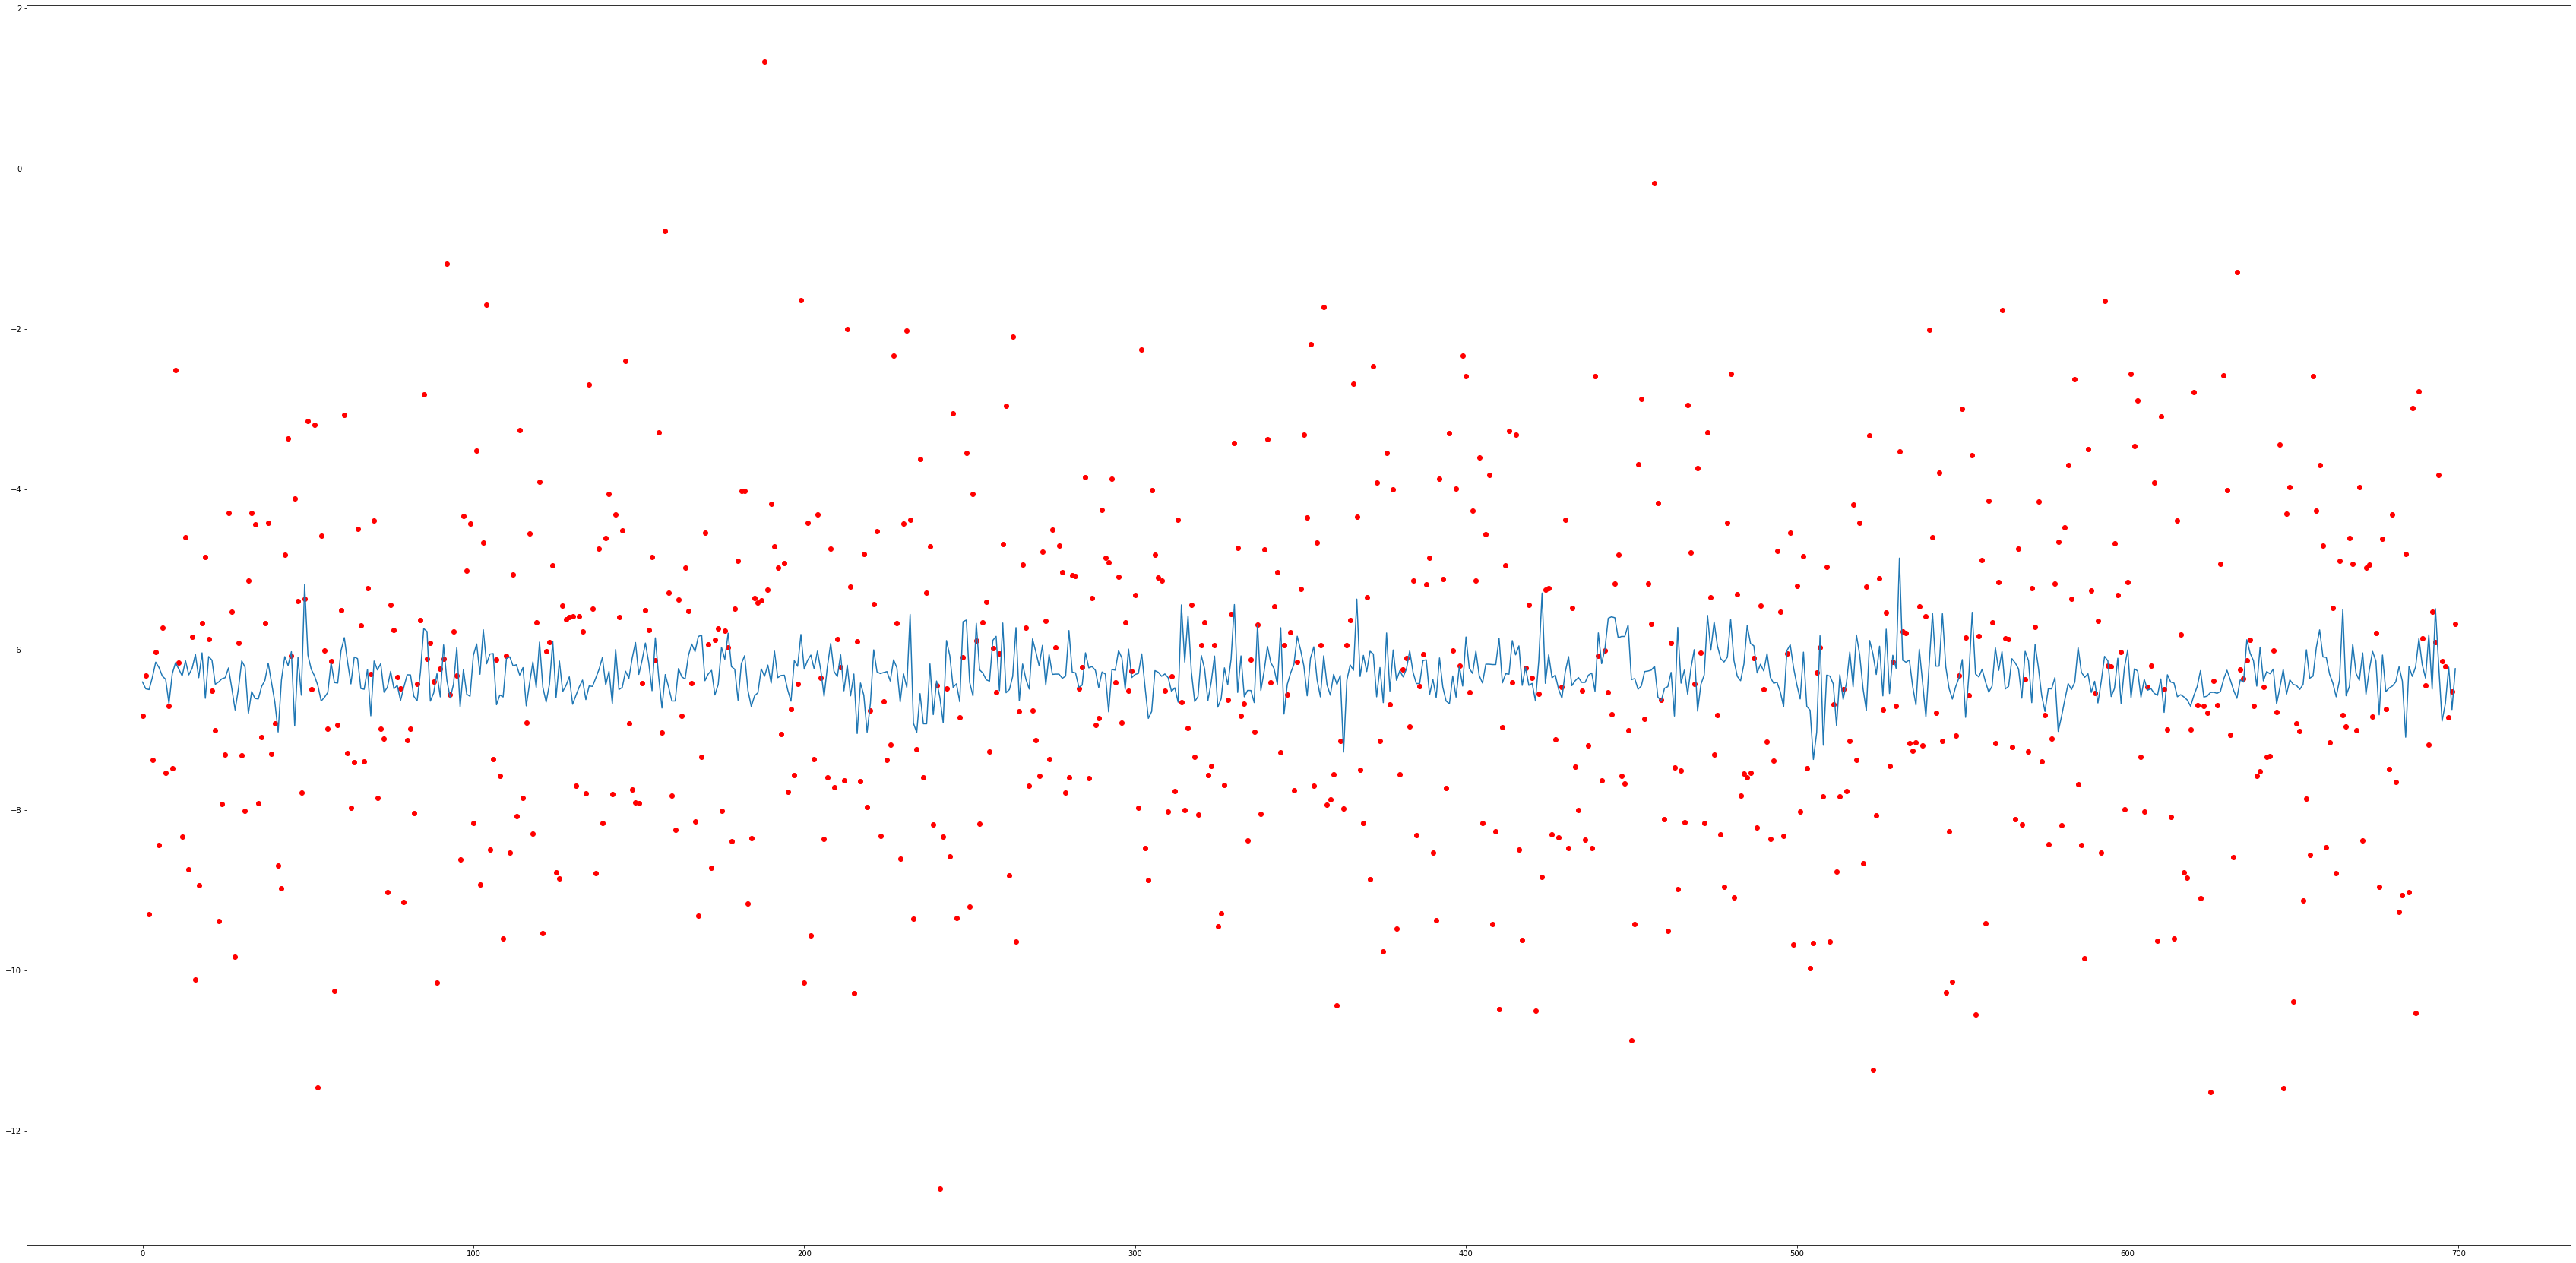

In [151]:
dim = feature_vector.shape[-1]

#SVD decomposition 
R = 0.1 * np.eye(dim)
A = (np.dot(feature_vector.T, feature_vector)) +R
u,s,v = np.linalg.svd(A)
Ainv = np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))

#Compute optimal w
w_hat = np.dot(Ainv, np.dot(feature_vector.T, y_train.T))
y_predict = np.dot(feature_vector, w_hat.T)
print(y_predict.shape)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(60,30))
plt.plot(y_predict,)
plt.scatter(t,y_train,c = 'red')

In [153]:
pd.DataFrame(w_hat).to_csv("./LeoniRegularized01.csv",header=None,index=None)